In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import ast

In [17]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

In [14]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [12]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [82]:
data=pd.read_csv('zomato.csv')
data.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [84]:
fidata=pd.concat([data,sentiment_data],axis=1)

In [85]:
fidata.drop(['address','url','phone'],axis=1,inplace=True)
fidata.drop_duplicates(inplace=True)

In [86]:
fidata.rate.replace(('NEW','-'),np.nan,inplace =True)
# first make it as string
fidata.rate = fidata.rate.astype('str')
# remove the "/5" 
fidata.rate = fidata.rate.apply(lambda x: x.replace('/5','').strip())
# convert column type to float
fidata.rate = fidata.rate.astype('float')

In [87]:
def get_rate(x):
    '''
    extract the rate value out of a string inside tuple
    '''
    # ensure that x is not Null and there is more than one rate
    if not eval(x) or len(eval(x)) <= 1:
        return None
    rate = [float(i[0].replace('Rated','').strip())  for i in eval(x) if type(i[0])== str]
    return round((sum(rate)/len(rate)),1)

In [88]:
fidata['review_rate']  = fidata.reviews_list.apply(lambda x : get_rate(x))

In [89]:
nan_index = fidata.query('rate != rate & review_rate == review_rate').index
for i in nan_index:
    fidata.loc[i,'rate'] = fidata.loc[i,'review_rate'] 

In [90]:
fidata.drop(columns='review_rate',axis=1,inplace=True)

In [91]:
fidata.dropna(subset=['rate', 'approx_cost(for two people)'],inplace=True)

In [4]:
data.reviews_list = data.reviews_list.apply(lambda x: ast.literal_eval(x))

In [5]:
def clear_text(t):
    '''
    clear the input text t
    '''
    return ' '.join([i[1].replace("RATED\n  ",'') for i in t]).encode('utf8').decode('ascii',errors='replace').\
           replace('?','').replace('�','').replace('\n','').replace('.',' ').replace('\s+','').strip().lower()

In [38]:
tqdm.pandas(tqdm)

In [35]:
from tqdm import tqdm, tqdm_pandas

In [39]:
data['reviews_text'] = data.reviews_list.progress_apply(lambda x: clear_text(x))


 87%|████████████████████████████████████████████████████████████████▌         | 45155/51717 [00:08<00:01, 3437.91it/s]


100%|██████████████████████████████████████████████████████████████████████████| 51717/51717 [00:10<00:00, 5122.47it/s]

In [28]:
import tqdm

In [40]:
data['cleanned']=data.reviews_text.progress_apply(lambda x: clean_text(x))


  1%|▍                                                                             | 309/51717 [00:17<38:01, 22.53it/s]


  1%|▉                                                                           | 663/51717 [00:40<1:18:20, 10.86it/s]


  2%|█▌                                                                         | 1040/51717 [01:03<3:01:29,  4.65it/s]


  3%|██                                                                           | 1378/51717 [01:22<28:56, 28.99it/s]


  4%|██▋                                                                          | 1816/51717 [01:46<17:10, 48.41it/s]


  4%|███▎                                                                       | 2254/51717 [02:12<1:58:50,  6.94it/s]


  5%|███▋                                                                       | 2555/51717 [02:39<1:15:30, 10.85it/s]


  5%|████                                                                       | 2836/51717 [03:00<1:26:30,  9.42it/s]


  6%|████▊                                                                        | 3198/51717 [03:19<30:06, 26.86it/s]


  7%|█████                                                                      | 3477/51717 [03:41<2:57:51,  4.52it/s]


  7%|█████▍                                                                     | 3766/51717 [04:00<2:36:30,  5.11it/s]


  8%|█████▊                                                                     | 4000/51717 [04:25<2:38:56,  5.00it/s]


  8%|██████▍                                                                      | 4361/51717 [04:50<48:48, 16.17it/s]


  9%|███████                                                                      | 4709/51717 [05:16<40:36, 19.30it/s]


 10%|███████▎                                                                   | 5011/51717 [06:04<1:32:10,  8.45it/s]


 10%|███████▌                                                                   | 5221/51717 [06:39<2:15:56,  5.70it/s]


 11%|███████▉                                                                   | 5498/51717 [07:07<5:17:14,  2.43it/s]


 11%|████████▍                                                                  | 5843/51717 [07:40<3:53:44,  3.27it/s]


 12%|████████▊                                                                  | 6078/51717 [08:21<5:29:57,  2.31it/s]


 12%|█████████                                                                  | 6233/51717 [08:46<1:44:08,  7.28it/s]


 13%|█████████▌                                                                 | 6612/51717 [09:28<9:09:50,  1.37it/s]


 13%|█████████▊                                                                 | 6809/51717 [09:57<1:45:15,  7.11it/s]


 14%|██████████▎                                                                | 7127/51717 [10:19<1:07:26, 11.02it/s]


 15%|██████████▉                                                                | 7532/51717 [10:41<1:46:28,  6.92it/s]


 15%|███████████▍                                                               | 7916/51717 [11:14<6:10:31,  1.97it/s]


 16%|████████████                                                               | 8277/51717 [11:44<7:07:30,  1.69it/s]


 16%|████████████▏                                                              | 8446/51717 [12:10<1:48:46,  6.63it/s]


 17%|████████████▉                                                                | 8710/51717 [12:28<33:56, 21.12it/s]


 17%|█████████████                                                              | 9025/51717 [12:47<1:14:32,  9.55it/s]


 18%|█████████████▊                                                               | 9294/51717 [13:12<36:12, 19.53it/s]


 19%|██████████████▎                                                              | 9573/51717 [13:46<26:44, 26.27it/s]


 19%|██████████████▊                                                              | 9927/51717 [14:10<37:34, 18.54it/s]


 20%|██████████████▉                                                           | 10422/51717 [14:38<1:02:14, 11.06it/s]


 21%|███████████████▌                                                          | 10876/51717 [15:06<7:04:16,  1.60it/s]


 21%|███████████████▋                                                          | 10965/51717 [15:37<3:07:12,  3.63it/s]


 22%|████████████████▍                                                           | 11199/51717 [15:55<30:03, 22.47it/s]


 22%|████████████████▍                                                         | 11499/51717 [16:45<2:14:14,  4.99it/s]


 23%|█████████████████▏                                                          | 11676/51717 [17:16<48:15, 13.83it/s]


 23%|█████████████████                                                         | 11891/51717 [17:45<1:57:14,  5.66it/s]


 24%|██████████████████                                                          | 12260/51717 [18:07<25:06, 26.20it/s]


 24%|█████████████████▉                                                        | 12543/51717 [18:37<4:03:43,  2.68it/s]


 24%|██████████████████▌                                                         | 12653/51717 [19:08<57:47, 11.27it/s]


 25%|███████████████████                                                         | 13004/51717 [19:33<35:47, 18.03it/s]


 26%|███████████████████                                                       | 13313/51717 [20:24<4:15:52,  2.50it/s]


 26%|███████████████████▉                                                        | 13592/51717 [20:55<51:07, 12.43it/s]


 27%|████████████████████▊                                                       | 14146/51717 [21:16<31:12, 20.07it/s]


 28%|█████████████████████▍                                                      | 14621/51717 [21:35<24:32, 25.19it/s]


 29%|█████████████████████▊                                                      | 14839/51717 [22:04<45:38, 13.47it/s]


 29%|█████████████████████▋                                                    | 15143/51717 [22:33<1:00:04, 10.15it/s]


 30%|██████████████████████▉                                                     | 15570/51717 [23:05<11:14, 53.58it/s]


 31%|██████████████████████▋                                                   | 15856/51717 [23:50<1:25:03,  7.03it/s]


 31%|███████████████████████▏                                                  | 16217/51717 [24:19<3:07:20,  3.16it/s]


 32%|███████████████████████▋                                                  | 16534/51717 [25:01<1:04:50,  9.04it/s]


 33%|████████████████████████▊                                                   | 16882/51717 [25:38<44:18, 13.10it/s]


 33%|█████████████████████████▏                                                  | 17140/51717 [26:13<25:07, 22.94it/s]


 34%|█████████████████████████                                                 | 17531/51717 [26:56<6:06:03,  1.56it/s]


 34%|██████████████████████████                                                  | 17705/51717 [27:24<56:11, 10.09it/s]


 35%|██████████████████████████▎                                                 | 17912/51717 [27:57<47:59, 11.74it/s]


 35%|██████████████████████████                                                | 18210/51717 [28:17<1:01:00,  9.15it/s]


 36%|███████████████████████████▎                                                | 18572/51717 [28:45<35:40, 15.48it/s]


 36%|██████████████████████████▊                                               | 18719/51717 [29:22<1:25:43,  6.42it/s]


 37%|███████████████████████████▉                                                | 18978/51717 [29:41<16:09, 33.78it/s]


 37%|████████████████████████████▎                                               | 19299/51717 [30:08<55:57,  9.65it/s]


 38%|████████████████████████████▌                                               | 19438/51717 [30:39<48:39, 11.06it/s]


 38%|████████████████████████████▏                                             | 19684/51717 [31:11<1:05:44,  8.12it/s]


 39%|████████████████████████████▌                                             | 19968/51717 [31:46<1:39:14,  5.33it/s]


 39%|█████████████████████████████▋                                              | 20222/51717 [32:11<37:29, 14.00it/s]


 40%|██████████████████████████████▏                                             | 20536/51717 [32:38<35:05, 14.81it/s]


 40%|██████████████████████████████▊                                             | 20926/51717 [32:58<15:45, 32.57it/s]


 41%|███████████████████████████████▏                                            | 21213/51717 [33:19<19:29, 26.09it/s]


 41%|███████████████████████████████▌                                            | 21461/51717 [33:47<58:02,  8.69it/s]


 42%|████████████████████████████████                                            | 21797/51717 [34:15<55:54,  8.92it/s]


 43%|████████████████████████████████▍                                           | 22075/51717 [34:43<31:39, 15.61it/s]


 43%|████████████████████████████████▉                                           | 22385/51717 [35:07<36:13, 13.49it/s]


 44%|█████████████████████████████████▍                                          | 22732/51717 [35:41<58:59,  8.19it/s]


 45%|█████████████████████████████████                                         | 23149/51717 [36:11<2:29:09,  3.19it/s]


 45%|██████████████████████████████████▍                                         | 23430/51717 [36:53<45:09, 10.44it/s]


 46%|███████████████████████████████████                                         | 23823/51717 [37:30<20:37, 22.55it/s]


 47%|███████████████████████████████████▍                                        | 24074/51717 [37:59<32:15, 14.28it/s]


 47%|███████████████████████████████████▊                                        | 24409/51717 [38:21<19:48, 22.99it/s]


 48%|████████████████████████████████████▍                                       | 24768/51717 [38:50<44:17, 10.14it/s]


 49%|████████████████████████████████████                                      | 25181/51717 [39:18<1:32:37,  4.77it/s]


 49%|█████████████████████████████████████▍                                      | 25461/51717 [39:41<44:55,  9.74it/s]


 50%|████████████████████████████████████▉                                     | 25773/51717 [40:10<1:26:57,  4.97it/s]


 51%|██████████████████████████████████████▍                                     | 26144/51717 [40:47<49:22,  8.63it/s]


 51%|█████████████████████████████████████▉                                    | 26498/51717 [41:25<3:23:22,  2.07it/s]


 52%|███████████████████████████████████████▏                                    | 26645/51717 [42:02<50:00,  8.36it/s]


 52%|██████████████████████████████████████▍                                   | 26869/51717 [42:28<1:03:16,  6.54it/s]


 52%|███████████████████████████████████████▉                                    | 27142/51717 [42:56<29:48, 13.74it/s]


 53%|████████████████████████████████████████▎                                   | 27420/51717 [43:21<44:49,  9.03it/s]


 54%|████████████████████████████████████████▋                                   | 27694/51717 [43:56<30:03, 13.32it/s]


 54%|█████████████████████████████████████████▎                                  | 28122/51717 [44:22<08:03, 48.79it/s]


 55%|████████████████████████████████████████▋                                 | 28409/51717 [45:11<3:48:24,  1.70it/s]


 55%|█████████████████████████████████████████▉                                  | 28501/51717 [45:43<38:09, 10.14it/s]


 56%|██████████████████████████████████████████▎                                 | 28761/51717 [46:01<20:38, 18.53it/s]


 56%|██████████████████████████████████████████▉                                 | 29209/51717 [46:42<46:28,  8.07it/s]


 57%|█████████████████████████████████████████▉                                | 29326/51717 [47:34<2:18:14,  2.70it/s]


 57%|███████████████████████████████████████████▍                                | 29535/51717 [48:07<29:50, 12.39it/s]


 58%|███████████████████████████████████████████▊                                | 29777/51717 [48:44<34:46, 10.52it/s]


 58%|████████████████████████████████████████████▏                               | 30045/51717 [49:11<43:15,  8.35it/s]


 59%|████████████████████████████████████████████▋                               | 30394/51717 [49:39<44:53,  7.92it/s]


 60%|████████████████████████████████████████████▏                             | 30888/51717 [50:23<1:34:14,  3.68it/s]


 60%|████████████████████████████████████████████▌                             | 31111/51717 [51:25<1:59:13,  2.88it/s]


 60%|████████████████████████████████████████████▊                             | 31278/51717 [52:05<1:42:59,  3.31it/s]


 61%|██████████████████████████████████████████████▎                             | 31514/51717 [52:39<29:59, 11.23it/s]


 62%|█████████████████████████████████████████████▊                            | 32005/51717 [53:30<4:22:10,  1.25it/s]


 62%|█████████████████████████████████████████████▉                            | 32132/51717 [54:14<1:33:30,  3.49it/s]


 63%|███████████████████████████████████████████████▌                            | 32324/51717 [54:44<53:32,  6.04it/s]


 63%|██████████████████████████████████████████████▌                           | 32557/51717 [55:22<1:25:16,  3.75it/s]


 63%|████████████████████████████████████████████████▏                           | 32827/51717 [56:00<29:11, 10.78it/s]


 64%|███████████████████████████████████████████████▎                          | 33098/51717 [56:31<2:33:24,  2.02it/s]


 65%|█████████████████████████████████████████████████                           | 33377/51717 [57:09<42:17,  7.23it/s]


 65%|█████████████████████████████████████████████████▋                          | 33824/51717 [57:54<56:43,  5.26it/s]


 66%|████████████████████████████████████████████████▌                         | 33965/51717 [58:51<6:10:48,  1.25s/it]


 66%|██████████████████████████████████████████████████                          | 34100/51717 [59:22<21:15, 13.81it/s]


 67%|██████████████████████████████████████████████████▋                         | 34455/51717 [59:54<16:38, 17.29it/s]


 67%|█████████████████████████████████████████████████▊                        | 34771/51717 [1:00:32<58:36,  4.82it/s]


 68%|██████████████████████████████████████████████████                        | 34958/51717 [1:01:05<29:59,  9.31it/s]


 68%|██████████████████████████████████████████████████▎                       | 35205/51717 [1:01:32<34:57,  7.87it/s]


 69%|██████████████████████████████████████████████████▊                       | 35535/51717 [1:01:56<45:41,  5.90it/s]


 69%|███████████████████████████████████████████████████▎                      | 35823/51717 [1:02:19<48:50,  5.42it/s]


 70%|███████████████████████████████████████████████████▊                      | 36224/51717 [1:02:51<27:47,  9.29it/s]


 71%|████████████████████████████████████████████████████▍                     | 36655/51717 [1:03:24<16:19, 15.38it/s]


 71%|███████████████████████████████████████████████████▏                    | 36750/51717 [1:04:00<1:13:58,  3.37it/s]


 71%|████████████████████████████████████████████████████▊                     | 36942/51717 [1:04:26<33:53,  7.27it/s]


 72%|█████████████████████████████████████████████████████▍                    | 37345/51717 [1:04:52<22:09, 10.81it/s]


 73%|████████████████████████████████████████████████████▍                   | 37672/51717 [1:05:51<1:37:28,  2.40it/s]


 73%|██████████████████████████████████████████████████████▏                   | 37891/51717 [1:06:24<22:56, 10.05it/s]


 74%|██████████████████████████████████████████████████████▊                   | 38301/51717 [1:07:27<25:22,  8.81it/s]


 75%|█████████████████████████████████████████████████████▊                  | 38643/51717 [1:07:55<1:02:12,  3.50it/s]


 75%|███████████████████████████████████████████████████████▊                  | 38963/51717 [1:08:17<06:19, 33.59it/s]


 76%|████████████████████████████████████████████████████████▌                 | 39525/51717 [1:08:42<25:20,  8.02it/s]


 77%|█████████████████████████████████████████████████████████                 | 39882/51717 [1:09:05<07:07, 27.70it/s]


 78%|█████████████████████████████████████████████████████████▌                | 40271/51717 [1:09:32<07:59, 23.88it/s]


 78%|██████████████████████████████████████████████████████████                | 40588/51717 [1:10:16<14:01, 13.23it/s]


 79%|██████████████████████████████████████████████████████████▌               | 40968/51717 [1:10:50<33:39,  5.32it/s]


 80%|███████████████████████████████████████████████████████████▏              | 41364/51717 [1:11:19<03:21, 51.27it/s]


 81%|███████████████████████████████████████████████████████████▌              | 41647/51717 [1:12:07<22:06,  7.59it/s]


 81%|████████████████████████████████████████████████████████████▏             | 42043/51717 [1:12:40<33:28,  4.82it/s]


 82%|████████████████████████████████████████████████████████████▌             | 42330/51717 [1:13:31<27:08,  5.77it/s]


 82%|████████████████████████████████████████████████████████████▉             | 42563/51717 [1:15:59<36:59,  4.12it/s]


 83%|█████████████████████████████████████████████████████████████▍            | 42900/51717 [1:16:23<18:31,  7.94it/s]


 84%|█████████████████████████████████████████████████████████████▉            | 43281/51717 [1:16:55<28:08,  5.00it/s]


 84%|██████████████████████████████████████████████████████████████▍           | 43657/51717 [1:17:17<05:46, 23.28it/s]


 85%|█████████████████████████████████████████████████████████████▏          | 43926/51717 [1:18:08<1:09:05,  1.88it/s]


 86%|███████████████████████████████████████████████████████████████▎          | 44255/51717 [1:18:35<04:31, 27.47it/s]


 86%|███████████████████████████████████████████████████████████████▉          | 44719/51717 [1:19:11<21:49,  5.35it/s]


 87%|██████████████████████████████████████████████████████████████▌         | 44954/51717 [1:19:48<1:19:38,  1.42it/s]


 88%|████████████████████████████████████████████████████████████████▊         | 45271/51717 [1:20:21<07:03, 15.21it/s]


 88%|█████████████████████████████████████████████████████████████████▎        | 45635/51717 [1:20:51<09:24, 10.77it/s]


 89%|█████████████████████████████████████████████████████████████████▌        | 45854/51717 [1:21:24<16:29,  5.93it/s]


 89%|█████████████████████████████████████████████████████████████████▉        | 46091/51717 [1:21:56<11:14,  8.35it/s]


 90%|██████████████████████████████████████████████████████████████████▎       | 46337/51717 [1:22:30<02:41, 33.35it/s]


 90%|██████████████████████████████████████████████████████████████████▉       | 46767/51717 [1:22:52<06:12, 13.29it/s]


 91%|███████████████████████████████████████████████████████████████████▍      | 47168/51717 [1:23:22<03:22, 22.47it/s]


 92%|███████████████████████████████████████████████████████████████████▊      | 47393/51717 [1:24:08<13:03,  5.52it/s]


 92%|████████████████████████████████████████████████████████████████████▏     | 47624/51717 [1:24:44<08:16,  8.24it/s]


 93%|████████████████████████████████████████████████████████████████████▊     | 48048/51717 [1:25:15<01:51, 32.83it/s]


 93%|█████████████████████████████████████████████████████████████████████▏    | 48328/51717 [1:25:42<05:49,  9.69it/s]


 94%|█████████████████████████████████████████████████████████████████████▉    | 48844/51717 [1:26:09<09:03,  5.29it/s]


 95%|██████████████████████████████████████████████████████████████████████▍   | 49263/51717 [1:26:32<05:59,  6.82it/s]


 96%|███████████████████████████████████████████████████████████████████████   | 49635/51717 [1:27:09<26:08,  1.33it/s]


 97%|███████████████████████████████████████████████████████████████████████▌  | 49973/51717 [1:27:42<03:45,  7.73it/s]


 97%|███████████████████████████████████████████████████████████████████████▉  | 50236/51717 [1:28:14<01:59, 12.37it/s]


 98%|████████████████████████████████████████████████████████████████████████▎ | 50559/51717 [1:28:36<01:04, 17.90it/s]


 99%|█████████████████████████████████████████████████████████████████████████ | 51030/51717 [1:29:04<00:24, 28.07it/s]


 99%|█████████████████████████████████████████████████████████████████████████▎| 51230/51717 [1:29:36<00:32, 14.95it/s]


100%|█████████████████████████████████████████████████████████████████████████▉| 51663/51717 [1:30:05<00:23,  2.31it/s]


100%|██████████████████████████████████████████████████████████████████████████| 51717/51717 [1:30:17<00:00,  5.47it/s]

In [41]:
data["sentiments"] = data["cleanned"].apply(lambda x: sid.polarity_scores(x))

In [73]:
senti=pd.DataFrame([i for i in data["sentiments"]])

In [75]:
sentiment_data=pd.concat([data["cleanned"],senti],axis=1)

In [77]:
sentiment_data.head(2)

,cleanned,compound,neg,neu,pos
0,beautiful place dine interior take back mughal...,0.9994,0.041,0.576,0.383
1,dinner family turn good choose suitable age pe...,0.9992,0.065,0.625,0.310


In [80]:
pd.Series(np.where(sentiment_data['pos'] > sentiment_data['neg'], 1, 0)).value_counts()

1    41888
0     9829
dtype: int64

In [76]:
sentti=sentiment_data.to_csv(r'F:\cap\zomato\sentiment_data.csv')

In [68]:
senti[senti['neg']>0.5].index

Int64Index([  980,  1452,  1812,  1830,  2225,  3172,  5428,  7303,  7417,
             8200,  8841,  9453,  9711,  9781, 10021, 10180, 10343, 11427,
            11733, 14909, 15323, 15861, 15992, 16193, 16683, 17348, 20310,
            20392, 20841, 20854, 20919, 22466, 22878, 22960, 23125, 23577,
            26901, 27255, 27609, 27748, 28797, 29917, 30323, 30375, 31567,
            32820, 33320, 33586, 34328, 35489, 36010, 37360, 37989, 38059,
            39711, 40883, 41935, 42557, 46365, 46789, 47627, 47653, 50315,
            51389],
           dtype='int64')

In [81]:
data.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),reviews_text,cleanned,sentiments
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[(Rated 4.0, RATED\n A beautiful place to din...",[],Buffet,Banashankari,a beautiful place to dine in the interiors tak...,beautiful place dine interior take back mughal...,"{'neg': 0.041, 'neu': 0.576, 'pos': 0.383, 'co..."
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[(Rated 4.0, RATED\n Had been here for dinner...",[],Buffet,Banashankari,had been here for dinner with family turned o...,dinner family turn good choose suitable age pe...,"{'neg': 0.065, 'neu': 0.625, 'pos': 0.31, 'com..."


In [7]:
data.reviews_text[0]

'a beautiful place to dine in the interiors take you back to the mughal era  the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available  but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again  i was here for dinner with my family on a weekday  the restaurant was completely empty  ambience is good with some good old hindi music  seating arrangement are good too  we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha  food was fresh and good, service is good too  good for family hangout cheers its a restaurant near to banashankari bda  me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet  on inquiring they said this place is mostly visited by vegetarians  anyways we ordered ala carte items which took ages to come  

In [10]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)

# clean text data
#reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))

In [19]:
cleann=clean_text(data.reviews_text[0])

In [21]:
cleann1=clean_text(data.reviews_text[1])

In [18]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
#reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))

In [20]:
sid.polarity_scores(cleann)

{'neg': 0.041, 'neu': 0.576, 'pos': 0.383, 'compound': 0.9994}

In [22]:
sid.polarity_scores(cleann1)

{'neg': 0.065, 'neu': 0.625, 'pos': 0.31, 'compound': 0.9992}

In [23]:
cleann1

"dinner family turn good choose suitable age people try place liked starter service good price affordable recommend restaurant early dinner place little noisy ambience really nice staff courteous price pretty high quantity overall experience fine quality food nice nothing extraordinary also buffet(only veg felt good little expensive quantity serve term taste decent nothing much talk ambience regular casual dining restaurant take family dinner lunch improve quantity may reduce price bit may improve presentation food might manage get repeat customer look quite place spend time family well want try new place since banashankari think try place place good rating part zomato gold decide try place delite see friendly staff food order tasty well food staff friendly definitely visit nice place dine good ambiance food good serving time also good neat restroom we'll arranged table thing go lunch notice kept play one music back back little annoy chicken biriyani good chicken fresh tender rice well

In [92]:
fidata.dropna(subset=['rest_type', 'cuisines'],inplace=True)

In [94]:
fidata.isnull().sum()

name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                           0
rest_type                          0
dish_liked                     19307
cuisines                           0
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
cleanned                           0
compound                           0
neg                                0
neu                                0
pos                                0
dtype: int64

In [98]:
def rateconvert(x):
    if x<3.0:
        return 0
    elif (x>=3.0) and (x<3.5):
        return 1
    elif (x>=3.5) and (x<4.0):
        return 2
    elif (x>=4.0) and (x<4.5):
        return 3
    else:
        return 4

In [96]:
mod=fidata[['online_order','book_table','approx_cost(for two people)','votes','location','rest_type','rate','neg','pos','neu']].copy()

In [188]:
mod1=fidata[['online_order','book_table','approx_cost(for two people)','votes','location','rest_type','rate']].copy()
mod1['rate']=mod1['rate'].apply(rateconvert)
mod1['online_order']=mod1['online_order'].map({'Yes':1,'No':0})
mod1['book_table']=mod1['book_table'].map({'Yes':1,'No':0})
mod1['approx_cost(for two people)']=mod1['approx_cost(for two people)'].apply(lambda x:x.replace(',','')).astype(int)

In [189]:
mod1.head()

,online_order,book_table,approx_cost(for two people),votes,location,rest_type,rate
0,1,1,800,775,Banashankari,Casual Dining,3
1,1,0,800,787,Banashankari,Casual Dining,3
2,1,0,800,918,Banashankari,"Cafe, Casual Dining",2
3,0,0,300,88,Banashankari,Quick Bites,2
4,0,0,600,166,Basavanagudi,Casual Dining,2


In [190]:
basmod1=pd.get_dummies(mod1.drop('rate',axis=1))
xx=basmod1
yy=mod1['rate']

In [191]:
X_train, X_test, y_train, y_test = train_test_split(xx, yy, test_size=0.25, random_state=42)

In [193]:
##final without three variables dt.
dt=clf.fit(X_train,y_train)
ypred=dt.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       647
           1       0.90      0.91      0.91      2316
           2       0.93      0.93      0.93      4552
           3       0.96      0.94      0.95      2727
           4       0.89      0.91      0.90       433

    accuracy                           0.92     10675
   macro avg       0.91      0.91      0.91     10675
weighted avg       0.92      0.92      0.92     10675



In [99]:
mod['rate']=mod['rate'].apply(rateconvert)
mod['online_order']=mod['online_order'].map({'Yes':1,'No':0})
mod['book_table']=mod['book_table'].map({'Yes':1,'No':0})

In [102]:
mod['approx_cost(for two people)']=mod['approx_cost(for two people)'].apply(lambda x:x.replace(',','')).astype(int)

In [103]:
mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42699 entries, 0 to 51716
Data columns (total 10 columns):
online_order                   42699 non-null int64
book_table                     42699 non-null int64
approx_cost(for two people)    42699 non-null int32
votes                          42699 non-null int64
location                       42699 non-null object
rest_type                      42699 non-null object
rate                           42699 non-null int64
neg                            42699 non-null float64
pos                            42699 non-null float64
neu                            42699 non-null float64
dtypes: float64(3), int32(1), int64(4), object(2)
memory usage: 3.4+ MB


In [128]:
#mod[['pos','neg']]
pd.Series(np.where(mod['pos'] > mod['neg'], 1, 0)).value_counts()

1    39787
0     2912
dtype: int64

In [106]:
basmod=pd.get_dummies(mod.drop('rate',axis=1))

In [108]:
X=basmod
y=mod['rate']

In [159]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [194]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [111]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

In [195]:
##final with three variables included dt.
dt=clf.fit(X_train,y_train)
ypred=dt.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       647
           1       0.91      0.90      0.90      2316
           2       0.92      0.92      0.92      4552
           3       0.92      0.93      0.93      2727
           4       0.88      0.85      0.86       433

    accuracy                           0.91     10675
   macro avg       0.90      0.89      0.89     10675
weighted avg       0.91      0.91      0.91     10675



In [187]:
##final with three variables included rf.
rf=RandomForestClassifier(random_state=42,n_estimators=201,class_weight='balanced',max_depth=37)
rff=rf.fit(X_train,y_train)
ypredd=rff.predict(X_test)
print(classification_report(y_test,ypredd))

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       647
           1       0.94      0.92      0.93      2316
           2       0.93      0.96      0.95      4552
           3       0.96      0.95      0.96      2727
           4       0.96      0.88      0.91       433

    accuracy                           0.94     10675
   macro avg       0.94      0.91      0.93     10675
weighted avg       0.94      0.94      0.94     10675



In [119]:
feature_importances = pd.DataFrame(rff.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

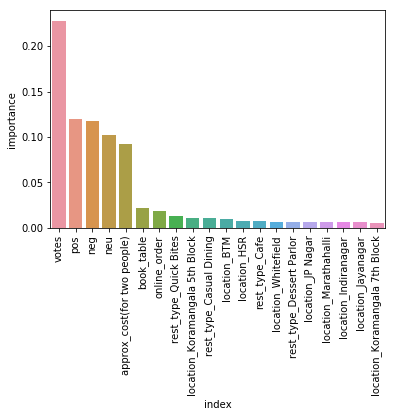

In [175]:
a=feature_importances.reset_index().head(20)
sns.barplot('index','importance',data=a)
plt.xticks(rotation=90)

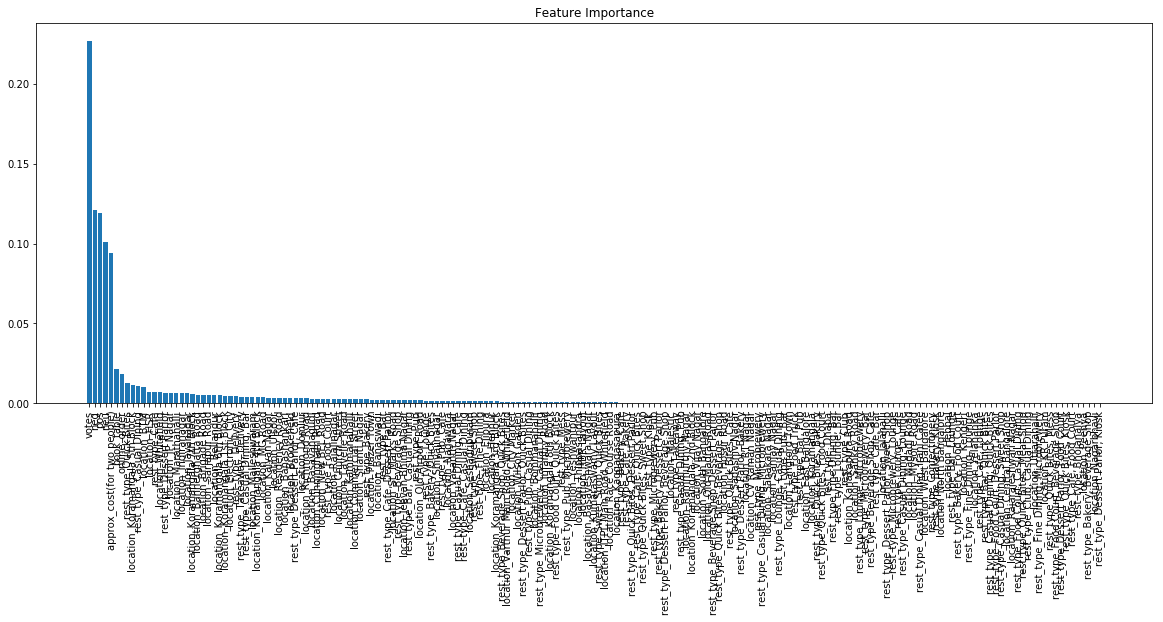

In [154]:
importances = rff.feature_importances_
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(20,7))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [176]:
rf=RandomForestClassifier(random_state=42,n_estimators=201,class_weight='balanced')
rff=rf.fit(X_train,y_train)
ypredd=rff.predict(X_test)
print(classification_report(y_test,ypredd))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90       647
           1       0.95      0.92      0.93      2316
           2       0.93      0.97      0.95      4552
           3       0.96      0.96      0.96      2727
           4       0.95      0.86      0.90       433

    accuracy                           0.94     10675
   macro avg       0.95      0.91      0.93     10675
weighted avg       0.94      0.94      0.94     10675



In [143]:
# from xgboost import XGBClassifier
# xg = XGBClassifier(max_depth=50,n_estimators=101,objective='multi:softmax',random_state=42)
# xgb=xg.fit(X_train,y_train)
# ypr=xgb.predict(X_test)
# print(classification_report(y_test,ypr))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       866
           1       0.93      0.91      0.92      3016
           2       0.93      0.95      0.94      5996
           3       0.95      0.95      0.95      3644
           4       0.92      0.86      0.89       569

    accuracy                           0.93     14091
   macro avg       0.93      0.90      0.92     14091
weighted avg       0.93      0.93      0.93     14091



In [160]:
# gb=GradientBoostingClassifier()
# gbc=gb.fit(X_train,y_train)
# yp=gbc.predict(X_test)
# print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.66      0.30      0.41       647
           1       0.75      0.63      0.69      2316
           2       0.68      0.80      0.74      4552
           3       0.75      0.75      0.75      2727
           4       0.74      0.56      0.64       433

    accuracy                           0.71     10675
   macro avg       0.72      0.61      0.64     10675
weighted avg       0.71      0.71      0.71     10675

